# LunarLander with RL

## 1️⃣ Introduction



### Présentation du projet et contexte



Ce projet a pour objectif d'explorer le **reinforcement learning (apprentissage par renforcement)** à travers un environnement classique : **LunarLander-v2**.

LunarLander est un simulateur dans lequel un module spatial doit atterrir en douceur sur la surface lunaire, en contrôlant ses moteurs latéraux et principal. Cet environnement propose un bon compromis entre complexité et accessibilité, idéal pour tester différents algorithmes d'apprentissage par renforcement.

Dans ce notebook, nous allons entraîner un agent intelligent capable de maîtriser ce jeu à l'aide d'algorithmes modernes comme **PPO (Proximal Policy Optimization)** et **DQN (Deep Q-Network)**. 

Le but est à la fois théorique — comprendre les concepts clés du RL — et pratique — obtenir un agent performant avec visualisation des résultats.

Ce travail sera ensuite exploitable comme un projet de portfolio sur GitHub, démontrant la maîtrise des techniques RL et la capacité à mettre en œuvre des solutions concrètes.


### Explication théorique du Reinforcement Learning (RL)

Le **Reinforcement Learning (RL)** est une méthode d’apprentissage automatique où un agent apprend à prendre des décisions optimales en interagissant avec un environnement.

Le processus se déroule en boucle :  
- L’agent observe un **état** (`state`) de l’environnement.  
- Il choisit une **action** (`action`) à effectuer.  
- L’environnement répond en fournissant une **récompense** (`reward`) et un nouvel état.  

L’objectif de l’agent est de maximiser la somme des récompenses qu’il reçoit sur le long terme, en apprenant une **politique** (`policy`) qui associe états et actions de manière optimale.

Ce cadre est formalisé par un **Processus de Décision Markovien (MDP)**, où :  
- `S` est l’ensemble des états possibles,  
- `A` est l’ensemble des actions possibles,  
- `P(s'|s,a)` est la probabilité de transition entre états,  
- `R(s,a)` est la récompense obtenue après action `a` en état `s`.

Les algorithmes de reinforcement learning se répartissent généralement en trois grandes catégories, selon ce qu’ils apprennent :

#### 1. Les méthodes **Value-based**  
Ces algorithmes apprennent une **fonction valeur**, c’est-à-dire une estimation de la "qualité" d’un état ou d’une action.  
- **Q-learning** et **Deep Q-Network (DQN)** sont des exemples emblématiques.  
- Ils calculent une fonction \( Q(s, a) \) qui estime la valeur attendue (cumulée des récompenses futures) de prendre une action \( a \) dans un état \( s \).  
- La politique optimale est ensuite dérivée en choisissant l’action qui maximise \( Q(s, a) \).  
- Ces méthodes fonctionnent principalement dans des espaces d’action **discrets**.

#### 2. Les méthodes **Policy-based**  
Ces algorithmes apprennent directement une **politique** \( \pi(a|s) \) qui donne la probabilité de choisir une action \( a \) dans un état \( s \).  
- Par exemple, **REINFORCE** et **Proximal Policy Optimization (PPO)**.  
- Elles optimisent la politique par gradient, en cherchant à maximiser la récompense cumulée.  
- Ces méthodes sont souvent plus stables et adaptées aux environnements avec des espaces d’action **discrets ou continus**.

#### 3. Les méthodes **Actor-Critic**  
Ce sont des méthodes hybrides qui combinent les deux approches précédentes :  
- L’**actor** apprend la politique (comme en policy-based)  
- Le **critic** apprend une fonction valeur (comme en value-based) qui guide la mise à jour de la politique  
- Exemples : **Advantage Actor-Critic (A2C)**, **Deep Deterministic Policy Gradient (DDPG)**  
- Elles sont particulièrement efficaces dans des environnements à actions **continues**.

---

Dans ce projet, nous allons commencer par entraîner un agent avec **PPO**, un algorithme policy-based réputé pour sa stabilité et ses bonnes performances. Ensuite, nous comparerons avec **DQN**, un algorithme value-based classique, pour voir leurs différences en pratique sur LunarLander.

Ce mélange te donnera une bonne compréhension des deux grandes familles d’algorithmes RL !


###  Présentation rapide de l’environnement LunarLander

LunarLander est un environnement de simulation développé par OpenAI Gym, inspiré du célèbre jeu où il faut faire atterrir en douceur un module spatial sur la surface de la Lune.

**Description**

- **Objectif** : Contrôler un module lunaire pour atterrir sans dommage sur une zone cible.  
- **États** :  
  L’environnement fournit un vecteur d’état de 8 dimensions comprenant :  
  - La position horizontale et verticale du module  
  - Sa vitesse horizontale et verticale  
  - L’angle d’inclinaison et la vitesse angulaire  
  - Deux indicateurs binaires indiquant si les pieds du module touchent le sol

- **Actions** :  
  L’environnement LunarLander-v2 propose 4 actions discrètes :  
  1. Ne rien faire  
  2. Allumer le moteur principal (poussée verticale)  
  3. Allumer le moteur gauche (poussée latérale droite)  
  4. Allumer le moteur droit (poussée latérale gauche)

- **Récompenses** :  
  - Récompense positive pour un atterrissage réussi et stable  
  - Pénalités pour collisions violentes ou perte de contrôle  
  - Bonus ou malus selon la consommation de carburant

**Versions**

- **LunarLander-v2** : version à actions discrètes (classique)  
- **LunarLanderContinuous-v2** : version avec actions continues pour un contrôle plus fin des moteurs

---

Cet environnement est idéal pour expérimenter les algorithmes de reinforcement learning car il combine un contrôle précis et un challenge non trivial, tout en restant accessible aux débutants et intermédiaires.

### Objectifs du notebook : apprentissage par PPO, DQN, etc.

Ce notebook a pour but de :

- **Comprendre les principes fondamentaux du reinforcement learning** à travers une application concrète.  
- **Mettre en œuvre et entraîner plusieurs algorithmes RL populaires**, notamment :  
  - **PPO (Proximal Policy Optimization)**, un algorithme policy-based stable et performant.  
  - **DQN (Deep Q-Network)**, un algorithme value-based classique efficace sur des espaces d’action discrets.  

- **Comparer les performances et comportements des agents entraînés** avec ces méthodes sur l’environnement LunarLander.  
- **Visualiser les résultats** à travers des simulations montrant les trajectoires d’atterrissage.  

À la fin de ce notebook, tu auras une bonne compréhension des différences entre ces algorithmes, ainsi qu’une base solide pour expérimenter d’autres méthodes de RL.









## 2️⃣ Installation et imports




Avant de commencer, il faut s’assurer que les packages nécessaires sont installés.

```bash
#Creation environnement et activation 
conda create -n rl_lander python=3.10
conda activate rl_lander 
# Installation des packages via pip
pip install swig
pip install "gymnasium[box2d]"
pip install stable-baselines3[extra]
pip install torch


In [2]:
import gymnasium as gym
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import matplotlib.pyplot as plt

# Pour visualiser les vidéos dans le notebook
from IPython import display
import cv2

## 3️⃣ Exploration et test de l’environnement



### 🔍 Description de l’environnement LunarLander-v3

LunarLander est un environnement de type Box2D fourni par Gymnasium.

L’objectif est d’atterrir en douceur sur une plateforme située au centre.  
L'agent contrôle un atterrisseur lunaire avec :
- Deux jambes pour stabiliser l’engin
- Un moteur principal et deux moteurs latéraux

#### ℹ️ Informations clés :

- **Espace d’états (`observation_space`)** :  

  Un vecteur `Box(8,)` contenant 8 valeurs :

  - position x et y
  - vitesse x et y
  - angle
  - vitesse angulaire
  - contact jambe gauche (booléen)
  - contact jambe droite (booléen)

- **Espace d’actions (`action_space`)** :  

  Discret avec 4 actions possibles :

  0. Ne rien faire  
  1. Feu principal (pousse vers le haut)  
  2. Feu latéral droit (fait tourner à gauche)  
  3. Feu latéral gauche (fait tourner à droite)

---

### 🎮 Test simple avec des actions aléatoires

On lance une simulation avec des actions aléatoires pour observer le fonctionnement de l’environnement.

### Création de l’environnement LunarLander

Reward total de l’épisode : -178.96


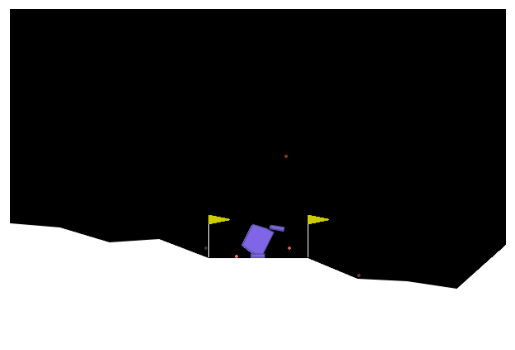

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Création de l’environnement en mode image
env = gym.make("LunarLander-v3", render_mode="rgb_array")

obs, info = env.reset(seed=42)
done = False
total_reward = 0 
while not done:
    action = env.action_space.sample()  # Action aléatoire
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward

    # Affichage de l'image dans le notebook
    frame = env.render()

    plt.imshow(frame)
    plt.axis("off")
    #display(plt.gcf())
    clear_output(wait=True)
    # pour ralentir l'animation

env.close()
print(f"Reward total de l’épisode : {total_reward:.2f}")

## 4️⃣ Présentation des algorithmes choisis



Dans ce projet, nous allons expérimenter avec deux grandes familles d’algorithmes de Reinforcement Learning (RL) :

- **DQN** (Deep Q-Network) — méthode Value-based
- **PPO** (Proximal Policy Optimization) — méthode Policy-based (Actor-Critic)

Ces deux approches sont populaires, performantes, et bien adaptées à des environnements comme LunarLander-v3.

---

### 🔹 DQN (Deep Q-Network)

DQN est une amélioration du Q-Learning classique, adaptée aux environnements à espace d’états **continu** grâce à l’utilisation d’un **réseau de neurones** pour approximer la fonction Q.

Caractéristiques :
- Basé sur l’estimation d’une **fonction valeur Q(s, a)**
- Convient aux **actions discrètes** (ce qui est le cas de LunarLander)
- Utilise une **replay buffer** pour stabiliser l’apprentissage
- Nécessite un **réseau de neurones** comme estimateur

✅ DQN fonctionne bien avec LunarLander car :
- L’espace d’actions est **discret** (4 actions)
- L’environnement est complexe mais maîtrisable

---

### 🔸 PPO (Proximal Policy Optimization)

PPO fait partie des méthodes **Policy Gradient**, où l’agent apprend une politique directement.  
C’est un algorithme **on-policy** robuste qui combine les avantages des méthodes Policy-based et Actor-Critic.

Caractéristiques :
- L’agent apprend une **politique π(a|s)** et une **fonction valeur V(s)**
- Contrôle les mises à jour pour éviter des changements brutaux dans la politique
- Très **stable** et **fiable**, même dans des environnements complexes
- Fonctionne avec actions **discrètes ou continues**

✅ PPO est un excellent choix pour LunarLander car :
- Il offre une **meilleure convergence** que DQN dans certains cas
- Il est plus **générique** (utilisable sur d'autres environnements plus complexes plus tard)

---

### ⚖️ Pourquoi ces choix pour LunarLander ?

| Critère                     | DQN                        | PPO                             |
|----------------------------|----------------------------|----------------------------------|
| Type de méthode            | Value-based                | Policy-based (Actor-Critic)     |
| Actions discrètes          | ✅ Oui                     | ✅ Oui                           |
| Facilité d'implémentation  | ⭐⭐⭐                       | ⭐⭐⭐⭐                            |
| Stabilité de l'entraînement| ⭐⭐                        | ⭐⭐⭐⭐                            |
| Utilisation courante       | ✅                        | ✅✅ (très populaire)             |

Nous allons donc tester **les deux** sur le même environnement pour :
- Comparer les performances
- Observer leur comportement
- Comprendre leurs forces et limites

---

👉 D'autres algorithmes comme **A2C**, **DDPG**, ou **SAC** pourront être explorés plus tard, notamment pour des environnements à actions continues.


## 5️⃣ 🔸 Entraînement avec PPO 

### Création de l’agent PPO (avec explication)

In [ ]:
# 📦 Import du modèle PPO de stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback

# 📂 Création d'un dossier pour sauvegarder le modèle
import os
model_dir = "models/PPO_LunarLander"
os.makedirs(model_dir, exist_ok=True)

# ✅ Création de l'agent PPO
model = PPO(
    policy="MlpPolicy",          # Réseau de neurones multilayer perceptron
    env=env,                     # L'environnement LunarLander-v3
    verbose=1,                   # Niveau de log (1 = infos, 0 = silence)
    learning_rate=3e-4,          # Taux d’apprentissage (valeur standard efficace)
    n_steps=2048,                # Taille du buffer de rollout
    batch_size=64,               # Taille des mini-batchs pour l’update
    n_epochs=10,                 # Nombre de passes sur les données par update
    gamma=0.99,                  # Facteur de discount (récompenses futures)
    gae_lambda=0.95,             # Avantage généralisé pour la variance/biais
    tensorboard_log="./ppo_tensorboard/"  # Pour suivi visuel (optionnel)
)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Lancement de l'entraînement

In [11]:
# 🎯 Entraînement du modèle
total_timesteps = 100_000

# Optionnel : Callback pour sauvegarder des checkpoints auto
checkpoint_callback = CheckpointCallback(
    save_freq=10_000,
    save_path=model_dir,
    name_prefix="ppo_lunarlander"
)

# ⏱️ Lancement de l'entraînement
model.learn(total_timesteps=total_timesteps, callback=checkpoint_callback)

Logging to ./ppo_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.3     |
|    ep_rew_mean     | -174     |
| time/              |          |
|    fps             | 926      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 94           |
|    ep_rew_mean          | -186         |
| time/                   |              |
|    fps                  | 730          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062142224 |
|    clip_fraction        | 0.00903      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance

### Sauvegarde manuelle du modèle final

In [12]:
# 💾 Sauvegarde manuelle du modèle entraîné
model.save(f"{model_dir}/ppo_lunarlander_final")

## 6️⃣ 🔸Évaluation PPO


### Chargement du modèle entraîné

In [7]:
from stable_baselines3 import PPO

# 🔁 Chargement du modèle sauvegardé précédemment
model_path = "models/PPO_LunarLander/ppo_lunarlander_final"
model = PPO.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Visualisation 


Dans le terminal : 

```bash
python test_ppo_lander.py

tensorboard --logdir ppo_tensorboard\PPO_1

##  7️⃣ 🔹 Entraînement avec DQN

### Introduction à DQN

Deep Q-Network (DQN) est un algorithme de Reinforcement Learning value-based qui combine Q-learning classique avec un réseau de neurones profond (deep neural network).  
L’idée est d’utiliser un réseau neuronal pour approximer la fonction Q(s, a), qui estime la valeur d’une action `a` dans un état `s`.  
Cela permet de gérer des espaces d’états continus ou très larges, ce qui est le cas pour des environnements complexes comme LunarLander.

DQN utilise plusieurs techniques clés pour stabiliser l’apprentissage, notamment :  
- Le **replay buffer** pour stocker les transitions et apprendre par mini-batchs, évitant la corrélation entre expériences successives.  
- Un **réseau cible** (target network) séparé mis à jour périodiquement pour stabiliser les cibles d’apprentissage.  
- La stratégie **ε-greedy** pour un bon équilibre entre exploration et exploitation.

---



### Paramètres clés de DQN

- `learning_rate` : taux d’apprentissage du réseau neuronal. Un petit taux assure une convergence stable.  
- `buffer_size` : taille maximale du replay buffer. Plus grand permet d’avoir plus de diversité d’expériences.  
- `learning_starts` : nombre de pas avant de commencer à entraîner le réseau, pour remplir un peu le buffer.  
- `batch_size` : nombre d’échantillons tirés du replay buffer à chaque mise à jour.  
- `tau` : paramètre de mise à jour du réseau cible (soft update).  
- `gamma` : facteur de discount, contrôle l’importance des récompenses futures.  
- `train_freq` : fréquence (en nombre de pas) à laquelle le réseau est entraîné.  
- `exploration_fraction` et `exploration_final_eps` : contrôle la décroissance de ε dans la stratégie ε-greedy, pour passer d’exploration à exploitation.

Ces paramètres influencent fortement la qualité et la vitesse d’apprentissage.

---

Dans la prochaine étape, nous allons créer notre agent DQN avec ces paramètres et lancer l’entraînement sur LunarLander.

### Création de l’agent DQN et entraînement

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
import os
model_dir = "models/dqn_LunarLander"
os.makedirs(model_dir, exist_ok=True)


# Création de l'agent DQN avec des paramètres clés
model = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=50000,
    learning_starts=1000,
    batch_size=32,
    tau=1.0,
    gamma=0.99,
    train_freq=4,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
    verbose=1,
    tensorboard_log="./dqn_tensorboard/"
)


# Sauvegarde du modèle entraîné
model.save("dqn_lunarlander_model")
print("Modèle DQN sauvegardé sous 'dqn_lunarlander_model.zip'")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Modèle DQN sauvegardé sous 'dqn_lunarlander_model.zip'


### Lancement de l'entraînement

In [10]:
from stable_baselines3.common.callbacks import CheckpointCallback
# 🎯 Entraînement du modèle
total_timesteps = 100_000

# Optionnel : Callback pour sauvegarder des checkpoints auto
checkpoint_callback = CheckpointCallback(
    save_freq=10_000,
    save_path=model_dir,
    name_prefix="DQN_lunarlander"
)

# ⏱️ Lancement de l'entraînement
model.learn(total_timesteps=total_timesteps, callback=checkpoint_callback)

Logging to ./dqn_tensorboard/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | -195     |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 757      |
|    time_elapsed     | 0        |
|    total_timesteps  | 417      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96       |
|    ep_rew_mean      | -242     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1190     |
|    time_elapsed     | 0        |
|    total_timesteps  | 768      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.8     |
|    ep_rew_mean      | -186     |
|    exploration_rate | 0.89     |
| time/             

### Sauvegarde manuelle du modèle final

In [11]:
# 💾 Sauvegarde manuelle du modèle entraîné
model.save(f"{model_dir}/dqn_lunarlander_final")

## 8️⃣ 🔹 Évaluation DQN


### Chargement du modèle entraîné

In [14]:
from stable_baselines3 import PPO

# 🔁 Chargement du modèle sauvegardé précédemment
model_path = "models/dqn_LunarLander/DQN_lunarlander_final"
model = DQN.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.



### Visualisation

Dans le terminal 
```bash
python test_dqn_lander.py
tensorboard --logdir dqn_tensorboard\DQN_1